In [1]:
!pip install --upgrade scikit-learn
!pip install --upgrade imblearn
!pip install --upgrade pycaret
from pycaret.classification import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.2
    Uninstalling scikit-learn-1.4.2:
      Successfully uninstalled scikit-learn-1.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sktime 0.26.0 requires scikit-learn<1.5.0,>=0.24, but you have scikit-learn 1.6.1 which is incompatible.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
  Using cached scikit_learn-1.4.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.4.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Atte

In [2]:
from google.colab import files
uploaded = files.upload()

Saving yield_df.csv to yield_df (4).csv


In [3]:
df = pd.read_csv('yield_df.csv')
df

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


# Pre-Processing

In [4]:
# Convert Year to integer
df['Year'] = df['Year'].astype('int64')

# Convert hg/ha_yield, average_rain_fall_mm_per_year, pesticides_tonnes, and avg_temp to float
df['hg/ha_yield'] = pd.to_numeric(df['hg/ha_yield'], errors='coerce').astype('float64')
df['average_rain_fall_mm_per_year'] = pd.to_numeric(df['average_rain_fall_mm_per_year'], errors='coerce').astype('float64')
df['pesticides_tonnes'] = pd.to_numeric(df['pesticides_tonnes'], errors='coerce').astype('float64')
df['avg_temp'] = pd.to_numeric(df['avg_temp'], errors='coerce').astype('float64')

# Convert Area and Item to strings
df['Area'] = df['Area'].astype('string')
df['Item'] = df['Item'].astype('string')

# Print the updated dataframe info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  string 
 2   Item                           28242 non-null  string 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  float64
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(4), int64(2), string(2)
memory usage: 1.7 MB
None


In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label Encoding for Area
le = LabelEncoder()
df['Area'] = le.fit_transform(df['Area'])

# One-Hot Encoding for Item
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
item_encoded = ohe.fit_transform(df[['Item']])
item_encoded_df = pd.DataFrame(item_encoded, columns=ohe.get_feature_names_out(['Item']))
df = pd.concat([df, item_encoded_df], axis=1)
df = df.drop('Item', axis=1)

In [27]:
df

,Area,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,-1.734041,-1.637075,36613.0,0.473294,-0.616366,-0.661069,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.734041,-1.637075,66667.0,0.473294,-0.616366,-0.661069,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.734041,-1.637075,23333.0,0.473294,-0.616366,-0.661069,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-1.734041,-1.637075,12500.0,0.473294,-0.616366,-0.661069,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-1.734041,-1.637075,7000.0,0.473294,-0.616366,-0.661069,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28237,1.995503,1.624512,22581.0,-0.693232,-0.575853,-0.123991,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
28238,1.995503,1.624512,3066.0,-0.693232,-0.575853,-0.123991,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
28239,1.995503,1.624512,13142.0,-0.693232,-0.575853,-0.123991,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28240,1.995503,1.624512,22222.0,-0.693232,-0.575853,-0.123991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [7]:
if 'Unnamed: 0' in df.columns:
  df = df.drop('Unnamed: 0', axis=1)

# EDA

In [8]:
df.describe()

,Area,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000,28242.000000,28242.000000,28242.000000,28242.000000,28242.000000,28242.000000,28242.000000
mean,46.494724,2001.544296,77053.332094,1149.05598,37076.909344,20.542627,0.07241,0.145917,0.019687,0.151406,0.119963,0.107606,0.114121,0.102330,0.136570,0.029991
std,26.813405,7.051905,84956.612897,709.81215,59958.784665,6.312051,0.25917,0.353030,0.138925,0.358450,0.324924,0.309887,0.317964,0.303087,0.343399,0.170565
min,0.000000,1990.000000,50.000000,51.00000,0.040000,1.300000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,1995.000000,19919.250000,593.00000,1702.000000,16.702500,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.000000,2001.000000,38295.000000,1083.00000,17529.440000,21.510000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68.000000,2008.000000,104676.750000,1668.00000,48687.880000,26.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,2013.000000,501412.000000,3240.00000,367778.000000,30.650000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


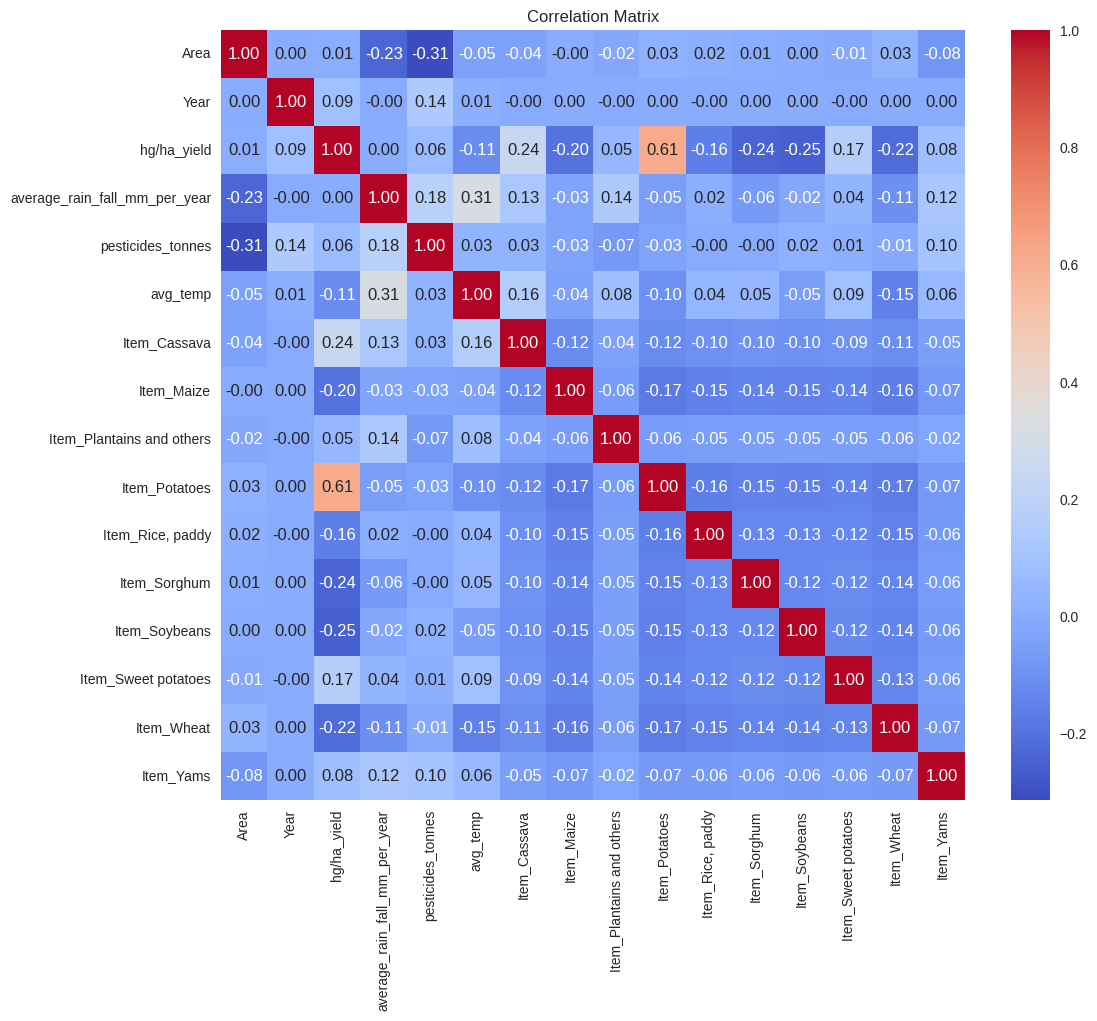

In [9]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

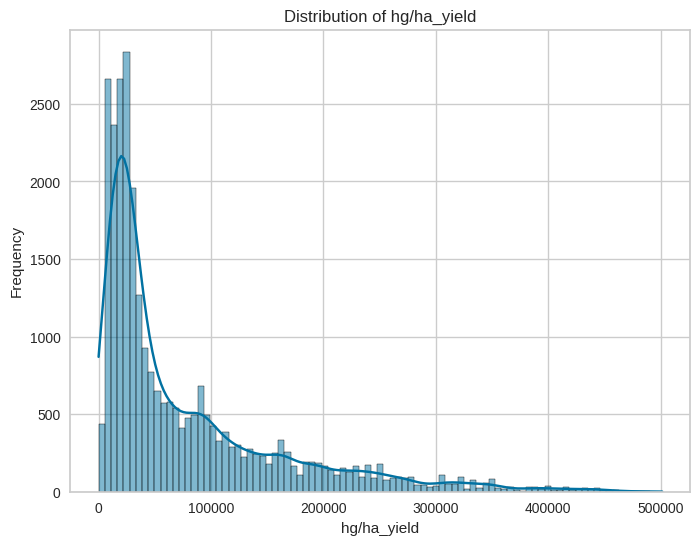

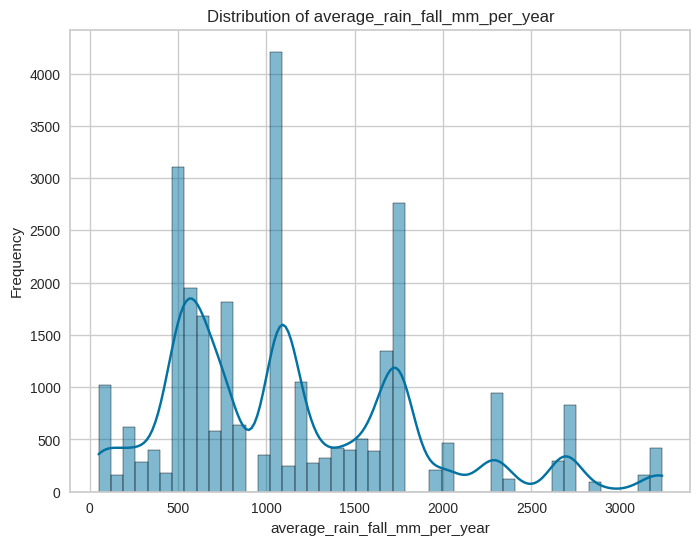

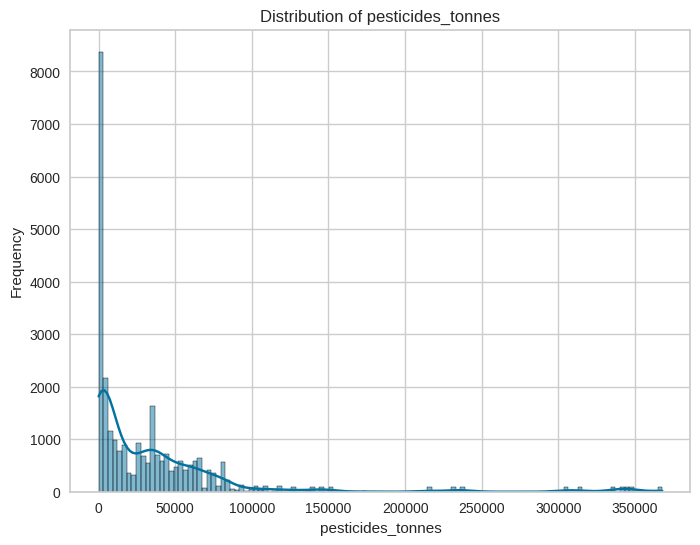

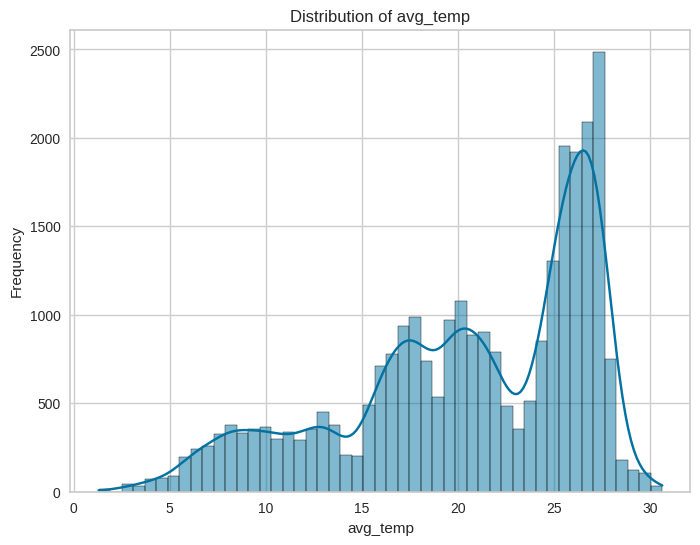

In [10]:
# Plotting histograms for numerical columns
numerical_cols = ['hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']

for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  sns.histplot(df[col], kde=True)  # You can choose kde=False for just histograms
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

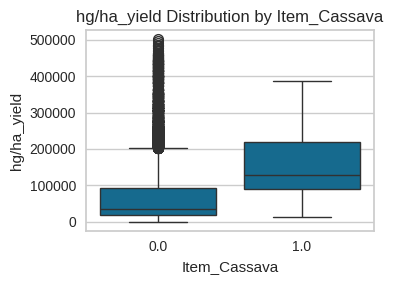

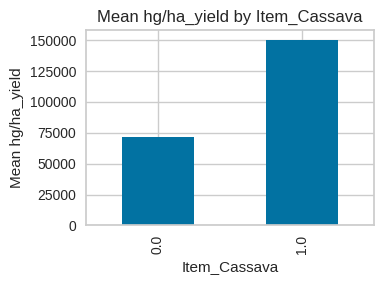

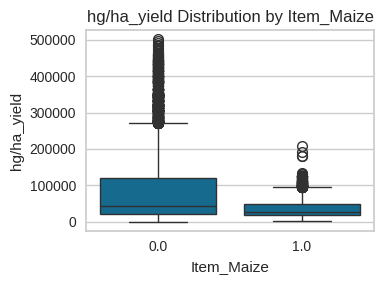

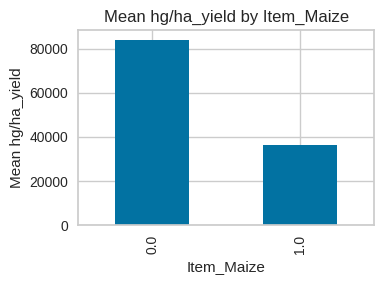

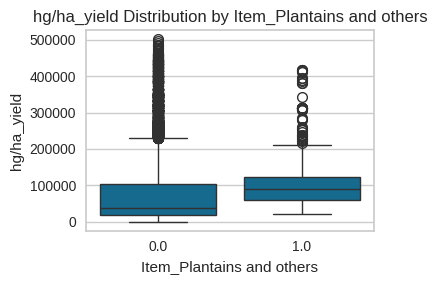

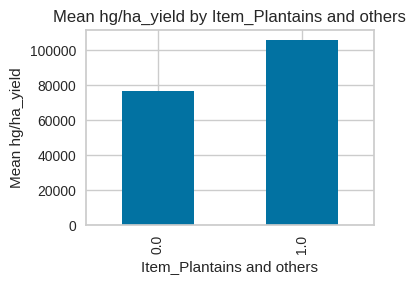

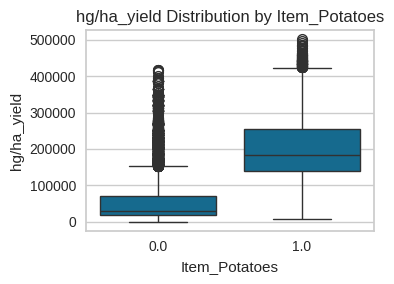

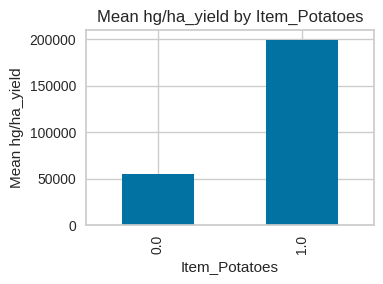

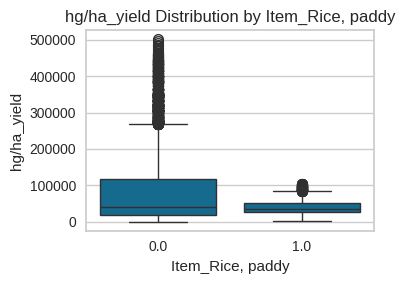

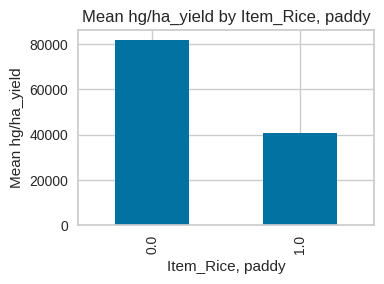

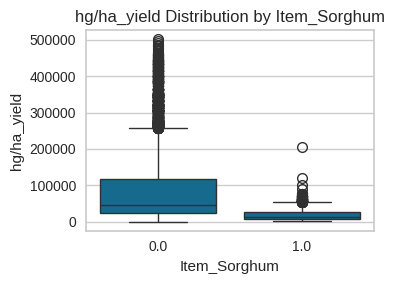

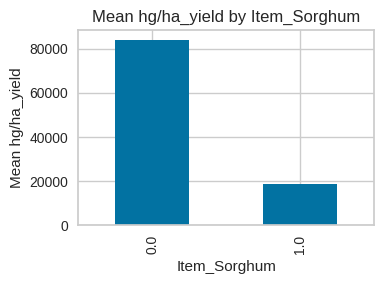

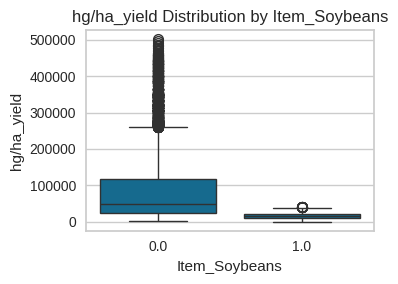

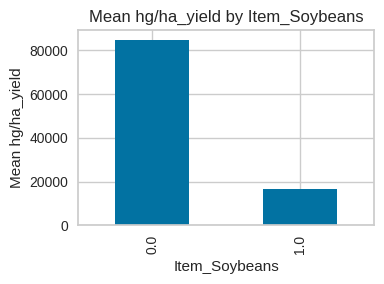

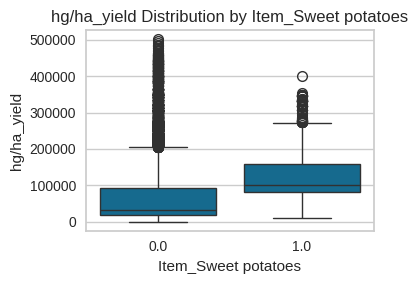

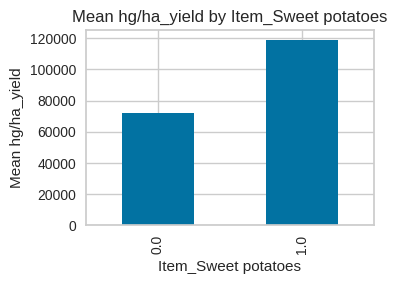

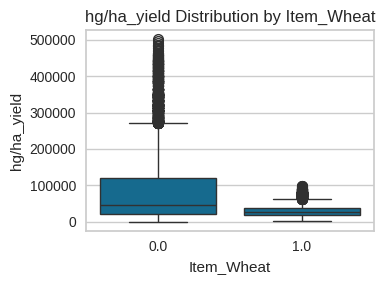

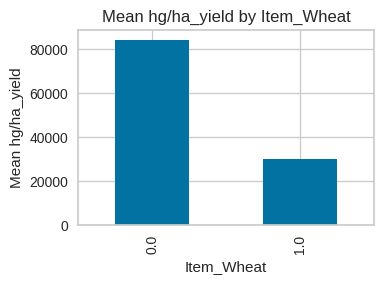

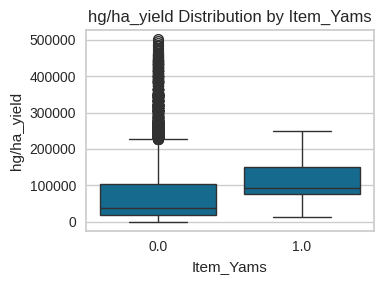

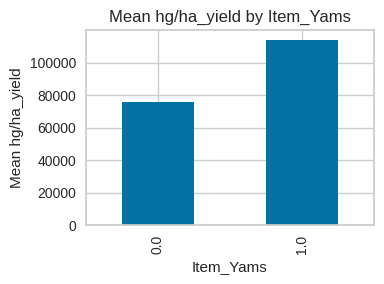

In [11]:
# Group by each Item_* column and analyze hg/ha_yield distribution
item_columns = [col for col in df.columns if col.startswith('Item_')]
for item_col in item_columns:
  plt.figure(figsize=(4, 3))  # Reduced figure size
  sns.boxplot(x=item_col, y='hg/ha_yield', data=df)
  plt.title(f'hg/ha_yield Distribution by {item_col}')
  plt.xlabel(item_col)
  plt.ylabel('hg/ha_yield')
  plt.tight_layout()  # Adjust subplot params for a tight layout
  plt.show()

  plt.figure(figsize=(4, 3))  # Reduced figure size
  df.groupby(item_col)['hg/ha_yield'].mean().plot(kind='bar')
  plt.title(f'Mean hg/ha_yield by {item_col}')
  plt.xlabel(item_col)
  plt.ylabel('Mean hg/ha_yield')
  plt.tight_layout()  # Adjust subplot params for a tight layout
  plt.show()


# Multi Layer Perceptron Model Building

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Define numerical columns to scale
numerical_columns = ['Area', 'Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Verify the scaled data
df[numerical_columns].head()
df[numerical_columns].describe()  # Check mean ~ 0 and std ~ 1 for scaled columns

,Area,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,2.824200e+04,2.824200e+04,2.824200e+04,2.824200e+04,2.824200e+04
mean,3.220362e-17,2.918453e-17,-3.220362e-17,-1.207636e-17,4.830543e-17
std,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00
min,-1.734041e+00,-1.637075e+00,-1.546994e+00,-6.183835e-01,-3.048608e+00
25%,-8.389506e-01,-9.280345e-01,-7.833986e-01,-5.899975e-01,-6.083909e-01
50%,-1.676327e-01,-7.718558e-02,-9.306286e-02,-3.260209e-01,1.532609e-01
75%,8.020487e-01,9.154715e-01,7.311134e-01,1.936526e-01,8.646112e-01
max,1.995503e+00,1.624512e+00,2.945823e+00,5.515571e+00,1.601310e+00


Splitting the Data

In [16]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('hg/ha_yield', axis=1)  # All columns except the target
y = df['hg/ha_yield']

# First split: 80% train+validation, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: 75% of temp (60% of total) train, 25% of temp (20% of total) validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Verify the shapes
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (16944, 15), (16944,)
Validation set: (5649, 15), (5649,)
Test set: (5649, 15), (5649,)


Designing and Training the MLP Regressor

In [17]:
from sklearn.neural_network import MLPRegressor

# Initialize the MLP Regressor
mlp = MLPRegressor(
    hidden_layer_sizes=(128, 64),  # 2 hidden layers: 128 and 64 neurons
    activation='relu',             # ReLU activation for non-linearity
    solver='adam',                 # Adam optimizer for efficiency
    max_iter=500,                  # Maximum epochs
    early_stopping=True,           # Stop if validation score doesn’t improve
    validation_fraction=0.1,       # Use 10% of training data for early stopping
    n_iter_no_change=10,           # Stop if no improvement for 10 iterations
    random_state=42,
    verbose=True                   # Print training progress
)

In [18]:
# Train the model
mlp.fit(X_train, y_train)

# Check training and validation scores
train_score = mlp.score(X_train, y_train)
val_score = mlp.score(X_val, y_val)
print(f"Training R² Score: {train_score:.4f}")
print(f"Validation R² Score: {val_score:.4f}")

Iteration 1, loss = 6493759170.42351913
Validation score: -0.813566
Iteration 2, loss = 6486889160.29056740
Validation score: -0.809703
Iteration 3, loss = 6459601142.87172222
Validation score: -0.797949
Iteration 4, loss = 6394630218.26082325
Validation score: -0.773939
Iteration 5, loss = 6276305500.33170700
Validation score: -0.733849
Iteration 6, loss = 6094923474.08076954
Validation score: -0.675916
Iteration 7, loss = 5848322412.15342999
Validation score: -0.601729
Iteration 8, loss = 5544758108.09854317
Validation score: -0.513124
Iteration 9, loss = 5200465949.40465641
Validation score: -0.415816
Iteration 10, loss = 4835586940.65758324
Validation score: -0.315289
Iteration 11, loss = 4471514932.39519882
Validation score: -0.216855
Iteration 12, loss = 4125495340.35923052
Validation score: -0.125079
Iteration 13, loss = 3806854737.69058371
Validation score: -0.040524
Iteration 14, loss = 3518185282.60974836
Validation score: 0.035730
Iteration 15, loss = 3259530119.81135654
Val

In [19]:
print(f"Training R² Score: {train_score:.4f}")
print(f"Validation R² Score: {val_score:.4f}")

Training R² Score: 0.8189
Validation R² Score: 0.8165


Model Evaluation

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on the test set
y_pred = mlp.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Test MAE: {mae:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R² Score: {r2:.4f}")

Test MAE: 20563.2008
Test RMSE: 36431.1798
Test R² Score: 0.8170


Visualization

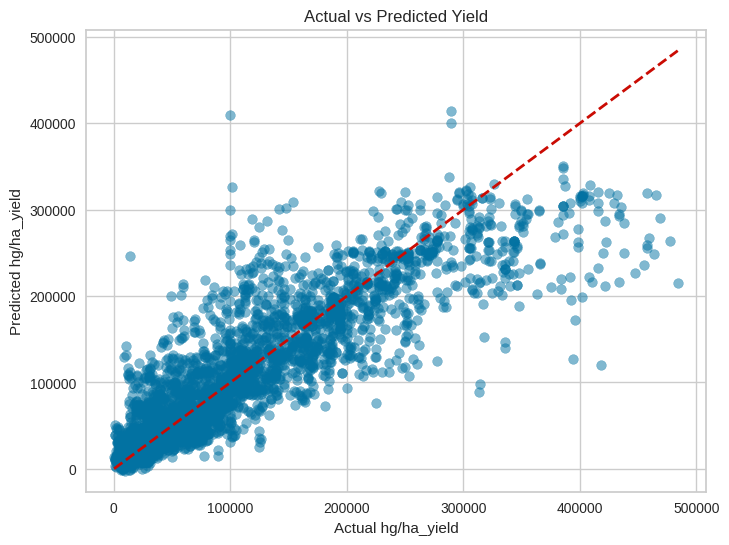

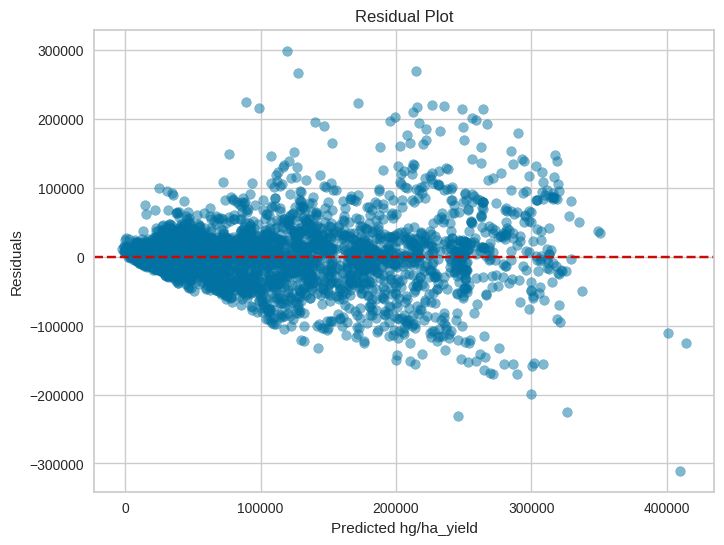

In [22]:
import matplotlib.pyplot as plt

# Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual hg/ha_yield')
plt.ylabel('Predicted hg/ha_yield')
plt.title('Actual vs Predicted Yield')
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted hg/ha_yield')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

Saving the model for deployment

In [23]:
import joblib

# Save the MLP model
joblib.dump(mlp, 'mlp_regressor.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Save the LabelEncoder and OneHotEncoder (from preprocessing)
joblib.dump(le, 'label_encoder_area.pkl')
joblib.dump(ohe, 'one_hot_encoder_item.pkl')

print("Model and preprocessing objects saved successfully!")

Model and preprocessing objects saved successfully!


In [28]:
from google.colab import files

# Download the model and preprocessing files
files.download('mlp_regressor.pkl')
files.download('scaler.pkl')
files.download('label_encoder_area.pkl')
files.download('one_hot_encoder_item.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
# Save the preprocessed DataFrame to a CSV
df.to_csv('preprocessed_yield_df.csv', index=False)
print("Preprocessed DataFrame saved as 'preprocessed_yield_df.csv'")

Preprocessed DataFrame saved as 'preprocessed_yield_df.csv'


In [30]:
files.download('preprocessed_yield_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>